## Multiple Regression with Gradient Descent (GD) & Stochastic Gradient Descent (SGD)

In [279]:
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la
import numpy as np

In [280]:
# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std

In [281]:
# Standardize the features of the examples in X by subtracting their mean and
# dividing by their standard deviation, as provided in the parameters.
def standardize(X, mean, std):
    S = (X - mean) / std
    return S

In [282]:
# Read data matrix X and labels t from text file.
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]
    t = data[:, -1]
    return X, t

## Gradient Function
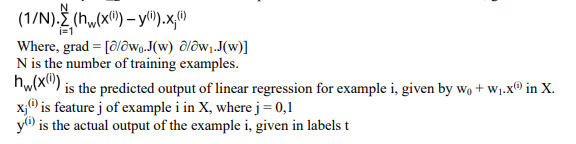

In [283]:
# Compute gradient of the objective function (cost) on dataset (X, t).
def compute_gradient(X, t, w):
    N = len(t)
    predictions = np.dot(X, w)
    error = predictions - t
    gradient = (1 / N) * np.dot(X.T, error)
    return gradient

### Cost Func
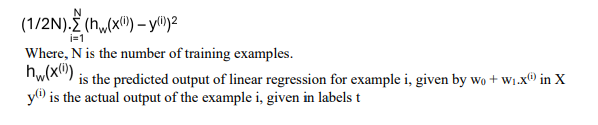

In [284]:
# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
    N = len(t)
    predictions = np.dot(X, w)
    error = predictions - t
    cost = (1 / (2 * N)) * np.dot(error.T, error)
    return cost

In [285]:
# Implementing gradient descent algorithm to compute w = [w0, w1, ..].
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        gradient = compute_gradient(X, t, w)
        w -= eta * gradient
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w, ep, costs

In [286]:
# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    N = len(t)
    predictions = np.dot(X, w)
    mse = np.mean((predictions - t) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [287]:
# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1, ..].
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(len(t)):
            random_index = np.random.randint(0, len(t))
            X_i = X[random_index:random_index+1]
            t_i = t[random_index:random_index+1]
            gradient = compute_gradient(X_i, t_i, w)
            w -= eta * gradient
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w, ep, costs


In [288]:

parser = argparse.ArgumentParser('Multiple Regression Exercise.')
parser.add_argument('-i', '--input_data_dir',
                    type=str,
                    default='../data/multiple',
                    help='Directory for the multiple houses dataset.')
FLAGS, unparsed = parser.parse_known_args()


In [289]:
# Reading training and test data.
Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/train.txt")
Xtest, ttest = read_data(FLAGS.input_data_dir + "/test.txt")

In [290]:
Xtrain

array([[3.032e+03, 4.000e+00, 2.500e+01],
       [2.078e+03, 4.000e+00, 2.300e+01],
       [2.400e+03, 3.000e+00, 1.100e+01],
       [2.128e+03, 3.000e+00, 1.900e+01],
       [1.404e+03, 3.000e+00, 2.600e+01],
       [1.299e+03, 2.000e+00, 1.700e+01],
       [1.672e+03, 3.000e+00, 1.900e+01],
       [2.468e+03, 5.000e+00, 2.200e+01],
       [1.191e+03, 3.000e+00, 2.700e+01],
       [1.840e+03, 3.000e+00, 2.600e+01],
       [3.360e+03, 3.000e+00, 2.500e+01],
       [1.968e+03, 3.000e+00, 1.400e+01],
       [1.450e+03, 2.000e+00, 1.800e+01],
       [2.893e+03, 4.000e+00, 2.300e+01],
       [1.319e+03, 2.000e+00, 1.500e+01],
       [1.588e+03, 3.000e+00, 1.400e+01],
       [2.600e+03, 4.000e+00, 1.100e+01],
       [2.700e+03, 4.000e+00, 8.000e+00],
       [3.266e+03, 4.000e+00, 1.400e+01],
       [1.569e+03, 2.000e+00, 1.500e+01],
       [3.754e+03, 6.000e+00, 1.100e+01],
       [1.422e+03, 3.000e+00, 1.800e+01],
       [1.280e+03, 2.000e+00, 8.000e+00],
       [2.905e+03, 4.000e+00, 2.60

In [291]:
Xtest

array([[5.000e+03, 5.000e+00, 2.300e+01],
       [1.961e+03, 3.000e+00, 2.400e+01],
       [2.799e+03, 5.000e+00, 1.600e+01],
       [1.614e+03, 3.000e+00, 1.800e+01],
       [3.531e+03, 4.000e+00, 2.500e+01],
       [1.319e+03, 2.000e+00, 1.400e+01],
       [2.804e+03, 6.000e+00, 9.000e+00],
       [2.200e+03, 4.000e+00, 1.600e+01],
       [9.120e+02, 2.000e+00, 1.000e+01],
       [1.800e+03, 1.000e+00, 1.500e+01],
       [1.768e+03, 3.000e+00, 1.600e+01],
       [2.596e+03, 4.000e+00, 1.100e+01],
       [1.822e+03, 3.000e+00, 2.300e+01],
       [1.634e+03, 2.000e+00, 1.600e+01],
       [1.422e+03, 3.000e+00, 1.800e+01],
       [1.092e+03, 4.000e+00, 2.100e+01],
       [2.420e+03, 3.000e+00, 2.300e+01],
       [1.569e+03, 2.000e+00, 1.500e+01],
       [3.787e+03, 5.000e+00, 1.000e+01],
       [2.844e+03, 4.000e+00, 2.700e+01],
       [2.760e+03, 4.000e+00, 1.800e+01],
       [1.746e+03, 4.000e+00, 1.400e+01],
       [1.422e+03, 3.000e+00, 1.800e+01],
       [4.190e+03, 5.000e+00, 1.60

In [292]:
ttrain

array([525000., 230000.,  87000., 180000., 183000., 135000., 117300.,
       233000., 165000., 199000., 310700., 152000., 136000., 360000.,
       134500., 144400., 410000., 169900., 379000., 149000., 550000.,
       147000., 154000., 223500., 141500., 140000., 167000., 279000.,
       215000., 271000., 329000., 375000., 242500., 475000., 384000.,
       175000., 375000., 168500., 439000., 265000., 250000., 300000.,
       399000., 145000., 385000., 210200., 195500., 320000., 312000.,
       290000.])

In [293]:
ttest

array([415000., 178000., 315000., 150000., 355000., 136000., 460000.,
       282000., 126000., 165400., 203500., 222000., 234000., 158000.,
       142500., 148000., 205000., 140000., 425000., 370000., 200000.,
       150000., 142500., 395000., 188000.])

In [294]:
 # Compute mean and standard deviation for feature scaling
mean, std = mean_std(Xtrain)

In [295]:
 # Standardize the training and test features
Xtrain = np.hstack((np.ones((Xtrain.shape[0], 1)), standardize(Xtrain, mean, std)))
Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), standardize(Xtest, mean, std)))

### Taking values of eta = 0.1 & epochs = 200 

In [296]:
# Computing parameters for each training method for eta=0.1 and 200 epochs
eta = 0.1
epochs = 200

### Trainning Model with GD

In [297]:
# GD
w_gd, eph_gd, costs_gd = train(Xtrain, ttrain, eta, epochs)

In [298]:
# Print model parameters for GD
print('Params GD: ', w_gd)

Params GD:  [254449.99982048  78079.18106675  24442.5758378    2075.95636731]


In [299]:
# Print cost and RMSE on training data for GD
print('Training RMSE GD: %0.2f.' % compute_rmse(Xtrain, ttrain, w_gd))
print('Training cost GD: %0.2f.' % compute_cost(Xtrain, ttrain, w_gd))

Training RMSE GD: 61070.62.
Training cost GD: 1864810304.94.


In [ ]:
  # Print cost and RMSE on test data for GD
print('Test RMSE GD: %0.2f.' % compute_rmse(Xtest, ttest, w_gd))
print('Test cost GD: %0.2f.' % compute_cost(Xtest, ttest, w_gd))

### Ploting Epochs,Costs (GD)

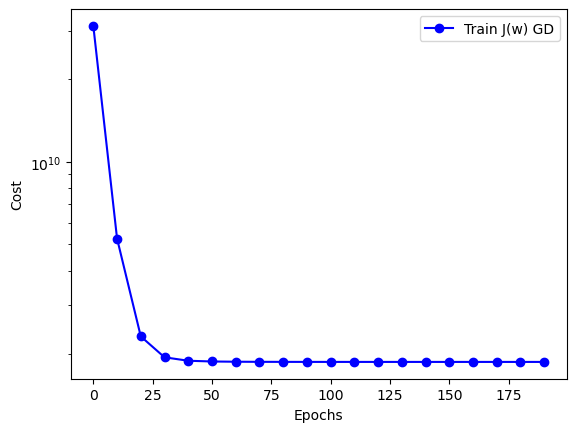

In [300]:
 # Plotting epochs vs. cost for gradient descent methods
plt.plot(eph_gd, costs_gd, 'bo-', label='Train J(w) GD')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')


# ....................................
### Trainning Model with SGD  (Bonus Part)

In [301]:
# (SGD)
w_sgd, eph_sgd, costs_sgd = train_SGD(Xtrain, ttrain, eta, epochs)

In [302]:
 # Print model parameters for SGD
print('Params SGD: ', w_sgd)

Params SGD:  [262984.0513572   93107.3931362   41256.27434858  34937.17514699]


In [303]:
  # Print cost and RMSE on training data for SGD
print('Training RMSE SGD: %0.2f.' % compute_rmse(Xtrain, ttrain, w_sgd))
print('Training cost SGD: %0.2f.' % compute_cost(Xtrain, ttrain, w_sgd))

Training RMSE SGD: 75709.65.
Training cost SGD: 2865975498.64.


In [304]:
 # Print cost and RMSE on test data for SGD
print('Test RMSE SGD: %0.2f.' % compute_rmse(Xtest, ttest, w_sgd))
print('Test cost SGD: %0.2f.' % compute_cost(Xtest, ttest, w_sgd))

Test RMSE SGD: 89955.68.
Test cost SGD: 4046012030.97.


### Plotting Epochs,Costs (SGD)

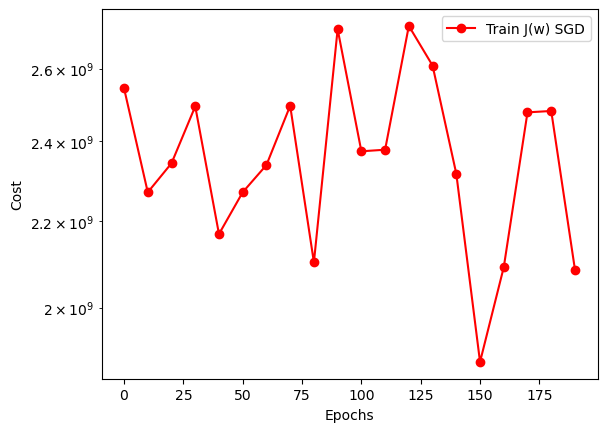

In [305]:
# Plotting epochs vs. cost for stochastic gradient descent methods
plt.plot(eph_sgd, costs_sgd, 'ro-', label='Train J(w) SGD')
plt.legend()
#plt.savefig('gd_sgd_cost_comparison.png')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.show('gd_sgd_cost_comparison.png')
plt.show()
plt.close()

# .......................................................
## Comparisions between GD vs SGD

Params SGD:  [266525.73321021  88010.1046819   13906.25110496  10040.03019912]
Training RMSE SGD: 63205.16.
Training cost SGD: 1997446385.73.
Test RMSE SGD: 68732.21.
Test cost SGD: 2362058267.56.


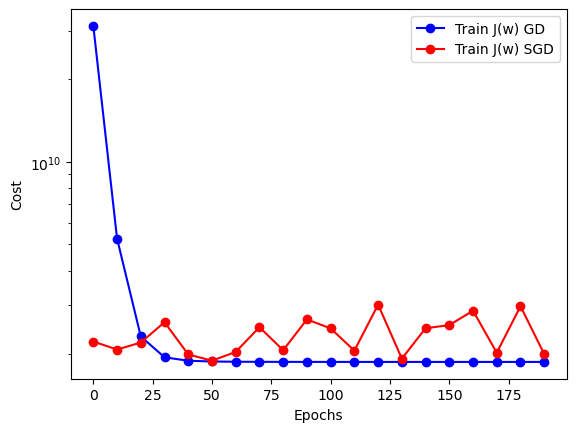

In [306]:
# Plotting epochs vs. cost for gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph_gd, costs_gd, 'bo-', label='Train J(w) GD')

    # Training the model with SGD
w_sgd, eph_sgd, costs_sgd = train_SGD(Xtrain, ttrain, eta, epochs)

# Print model parameters for GD
print('Params GD: ', w_gd)
    # Print model parameters for SGD
print('Params SGD: ', w_sgd)

# Print cost and RMSE on training data for GD
print('Training RMSE GD: %0.2f.' % compute_rmse(Xtrain, ttrain, w_gd))
print('Training cost GD: %0.2f.' % compute_cost(Xtrain, ttrain, w_gd))
  # Print cost and RMSE on test data for GD
print('Test RMSE GD: %0.2f.' % compute_rmse(Xtest, ttest, w_gd))
print('Test cost GD: %0.2f.' % compute_cost(Xtest, ttest, w_gd))
    # Print cost and RMSE on training data for SGD
print('Training RMSE SGD: %0.2f.' % compute_rmse(Xtrain, ttrain, w_sgd))
print('Training cost SGD: %0.2f.' % compute_cost(Xtrain, ttrain, w_sgd))

    # Print cost and RMSE on test data for SGD
print('Test RMSE SGD: %0.2f.' % compute_rmse(Xtest, ttest, w_sgd))
print('Test cost SGD: %0.2f.' % compute_cost(Xtest, ttest, w_sgd))

    # Plotting epochs vs. cost for stochastic gradient descent methods
plt.plot(eph_sgd, costs_sgd, 'ro-', label='Train J(w) SGD')
plt.legend()
plt.savefig('gd_sgd_cost_comparison.png')
plt.show()
plt.close()


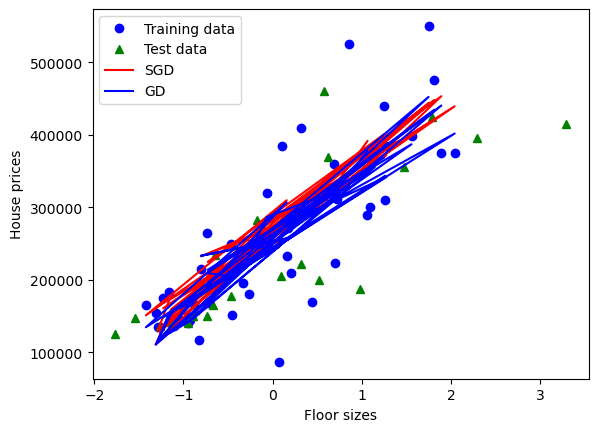

In [307]:
# Plotting linear approximation for each training method
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 1], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 1], ttest, 'g^', label='Test data')
plt.plot(Xtrain[:, 1], np.dot(Xtrain, w_sgd), 'r', label='SGD')
plt.plot(Xtrain[:, 1], np.dot(Xtrain, w_gd), 'b', label='GD')
plt.legend()
plt.show()
plt.savefig('train-test-line.png')
plt.close()